## EDA Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
#Importing necessary packages and libraries
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

In [2]:
#loading downloaded data
df=pd.read_json('~/Downloads/reviews_Electronics_5.json', lines=True)

### Loading pickled webscraping files

In [3]:

with open('stuff.pickle', 'rb') as file:
      
    # Call load method to deserialze
    stuff = pickle.load(file)
with open('links.pickle', 'rb') as file:
      
    # Call load method to deserialze
    links = pickle.load(file)

In [4]:
with open('stuff1.pickle', 'rb') as file:
      
    # Call load method to deserialze
    stuff1 = pickle.load(file)
with open('links1.pickle', 'rb') as file:
      
    # Call load method to deserialze
    links1 = pickle.load(file)

In [5]:
import pickle
with open('stuff2.pickle', 'rb') as file:
      
    # Call load method to deserialze
    stuff2 = pickle.load(file)
with open('links2.pickle', 'rb') as file:
      
    # Call load method to deserialze
    links2 = pickle.load(file)

### Combining all the data

In [6]:
#turning lists into series
df1= pd.Series(links)
df2=pd.Series(links1)
df3=pd.Series(links2)

In [7]:
#getting asin from links for common merge column
df1= pd.Series(df1[i][-10:] for i in range(len(df1)))
stuff=pd.Series(stuff)
frame1=pd.concat([df1,stuff],axis=1)
frame1

,0,1
0,0528881469,Rand McNally 528881469 7-inch Intelliroute TND...
1,0594451647,Barnes & Noble HDTV Adapter Kit for NOOK HD an...
2,0594481813,Barnes & Noble OV/HB Universal Power Kit for N...
3,0972683275,"VideoSecu 24"" Long Arm TV Wall Mount Low Profi..."
4,1400501466,"Barnes & Noble NOOK Tablet 16gb (Color, BNTV250)"
...,...,...
9418,B000IMC16G,Scosche IPNRFC Wireless Car RF Remote for iPod
9419,B000IMDPS4,Opteka Microfiber Deluxe Photo/Video Camera Ga...
9420,B000IMFOZQ,SCOSCHE I635 Hookup 3.5mm Auxiliary Audio Cabl...
9421,B000IMK9FG,Opteka 500mm f/8 High Definition Telephoto Mir...


In [8]:
df2= pd.Series(df2[i][-10:] for i in range(len(df2)))
stuff1=pd.Series(stuff1)
frame2=pd.concat([df2,stuff1],axis=1)
frame2

,0,1
0,B000IMRTFO,Opteka 650-1300mm f/8 HD Telephoto Zoom Lens f...
1,B000IMSGC4,Itrip Auto Universal
2,B000IMSK8Y,Logitech Harmony 670 Universal Remote (Discont...
3,B000IMWEHM,HP PD0800 Pocket Media Drive 80 GB USB 2.0 Por...
4,B000IMWI00,HP MV2010 Media Vault 300 GB External Hard Drive
...,...,...
8611,B001OD76SG,Acer X233H bid 23-Inch LCD Monitor
8612,B001ODKN36,StarTech.com Mini DVI to VGA Video Cable Adapt...
8613,B001ODNBDK,StarTech.com Mini DVI to HDMI Video Adapter fo...
8614,B001ODOL3Y,Coby TF-TV3217 32-Inch 720p LCD TV


In [9]:
df3= pd.Series(df3[i][-10:] for i in range(len(df3)))
stuff2=pd.Series(stuff2)
frame3=pd.concat([df3,stuff2],axis=1)
frame3

,0,1
0,B001OFJZDI,Monoprice HDMI Coupler (Female to Female)
1,B001OFNLXI,StarTech.com 20in Slimline SATA to SATA with L...
2,B001OGZ2WK,Avantalk BTDG-20 Bluetooth Wireless USB V2.0 +...
3,B001OI2LV8,Sony Cyber-shot DSC-H20/B 10.1 MP Digital Came...
4,B001OI2VAY,JBL Duet II High Performance Speaker System fo...
...,...,...
8841,B003JUN9YW,GSI Super Quality Motorcycle Helmet Dual-Sided...
8842,B003JUXWSU,Nook Barnes and Nobles Electronic eBook Reader...
8843,B003JV3XZ6,Menotek Mini DisplayPort to HDMI Converter cab...
8844,B003JVTOA4,Durable Protective Digital Camera Bag with Len...


In [10]:
#merging dfs using asin
frames=pd.concat([frame1, frame2, frame3], axis=0)
frames.rename(columns={0:'asin'}, inplace=True)
work_df=df.merge(frames, how='inner', on= 'asin') 


In [11]:
work_df.rename(columns={1:'item'}, inplace=True)

In [12]:
#finalized df
work_df=df

In [19]:
import pickle
with open ('df.pickle', 'wb') as f:
    pickle.dump(df, f, 5)

In [13]:
with open('tagzz.pickle', 'rb') as file:
      
    # Call load method to deserialze
    tagzz = pickle.load(file)

### Cleaning data

In [14]:
entire_list=[]
for ele in tagzz:
    entire_list.extend(ele)

viz_list=pd.Series(entire_list)

### Most common product types viz

In [85]:
#this viz was created using Tableau
viz_list.to_csv('viz1.csv')

In [15]:
#Top 60 item categories in dataset
pd.Series(tagzz).value_counts()[0:60]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Point & Shoot Digital Cameras]    718
[]                                 613
[Camera Cases]                     582
[LED & LCD TVs]                    580
[Earbud Headphones]                499
[Cases]                            480
[MP3 & MP4 Players]                458
[SLR Camera Lenses]                346
[External Hard Drives]             338
[Camera Batteries]                 326
[Mice]                             325
[Memory]                           321
[Connectors & Adapters]            315
[Camcorders]                       297
[Monitors]                         258
[USB Cables]                       254
[Traditional Laptops]              248
[Computers & Accessories]          247
[HDMI Cables]                      245
[Remote Controls]                  240
[Over-Ear Headphones]              235
[Audio Docks]                      231
[Computer Speakers]                226
[USB Flash Drives]                 224
[DVD Players]                      215
[Batteries]              

### Most common words in df.reviewText

In [16]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [17]:
df.shape

(1689188, 9)

In [18]:
#created a NLP processing function that includes all the steps of corpus cleaning and creation and
#vectorization
import string
from nltk.stem import WordNetLemmatizer

def NLP_process(data):
    BoW=[]
    for word in data:
        BoW.append(word)
    word_bank= ' '.join(BoW)
    word_bank= word_bank.lower()
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_tweets= tokenizer.tokenize(word_bank)

    sw_list = stopwords.words('english')
    sw_list += list(string.punctuation)
    sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', '.']
    sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter',  
            'status']
    sw_set = set(sw_list)
    filtered_tweets=[]
    for word in tokenized_tweets:
        if word not in sw_set:
            filtered_tweets.append(word)
     
    lemmatizer=WordNetLemmatizer()
    X_lemmatized_tweets=[]
    for w in filtered_tweets:
        X_lemmatized_tweets.append(lemmatizer.lemmatize(w))
    return (X_lemmatized_tweets)
    
#     tfidf = TfidfVectorizer(stop_words=sw_list, ngram_range=(1,1), lowercase=True)
#     tfidf_data_test_lem = tfidf.transform(X_lemmatized_tweets)
#     return tfidf_data_test_lem 

In [21]:
from tqdm import tqdm

In [28]:
test=[NLP_process(df.reviewText[0:])]

In [23]:
from collections import Counter

In [31]:
Counter(test[0]).most_common(30)

[('work', 770308),
 ('use', 719571),
 ('great', 672934),
 ('good', 628151),
 ('like', 617791),
 ('would', 570468),
 ('get', 561721),
 ('well', 519807),
 ('camera', 507637),
 ('time', 466438),
 ('case', 442203),
 ('sound', 416847),
 ('cable', 413376),
 ('also', 393000),
 ('quality', 392805),
 ('product', 383728),
 ('price', 377841),
 ('really', 350998),
 ('battery', 348899),
 ('drive', 348818),
 ('much', 348228),
 ('need', 340076),
 ('even', 318589),
 ('using', 315495),
 ('device', 311564),
 ('tv', 302830),
 ('problem', 302788),
 ('better', 297552),
 ('bought', 296639),
 ('make', 296533)]

In [34]:
len(test[0])

97502650

In [35]:
#observing the frequency of common words in the corpus
word_freq= pd.DataFrame(test[0])
word_freq[0].value_counts().head(50)

work        770308
use         719571
great       672934
good        628151
like        617791
would       570468
get         561721
well        519807
camera      507637
time        466438
case        442203
sound       416847
cable       413376
also        393000
quality     392805
product     383728
price       377841
really      350998
battery     348899
drive       348818
much        348228
need        340076
even        318589
using       315495
device      311564
tv          302830
problem     302788
better      297552
bought      296639
make        296533
used        292885
thing       291193
little      289082
screen      283429
usb         280760
easy        278532
back        269878
still       257629
computer    255453
card        254317
lens        251012
nice        247799
unit        247508
fit         244157
go          243058
two         238999
want        237996
video       235880
buy         233815
could       233362
Name: 0, dtype: int64

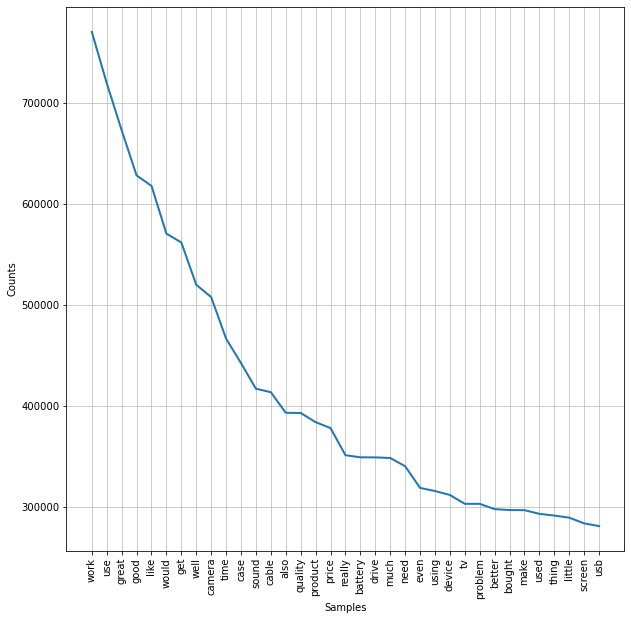

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
#observing the frequency distribution of popular words in corpus
fdist=FreqDist(test[0])
plt.figure(figsize=(10,10))
fdist.plot(35)

### Sentiment Analysis of reviews (pos, neu, neg)

### number pos, neu, neg reviews of df.reviewText

### Category with most positive reviews

### Category with most negative reviews